<a href="https://colab.research.google.com/github/aompong/Vision-And-Deep-Learning-2025/blob/main/Vision_Assignment2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to our second IST596/696 Computer Vision Assignment!
Submission release: Feb 20

Submission deadline: March 4, 11.59pm

The assignment is about automatic panorama stitching!
There are 9 coding TODOs, and a single write-up section. We've provided unit and system tests for the code.

Tips:
1. You can write the whole pipeline at once, but we recommend writing each component in the order that they appear in this notebook, test each component with the provided tests before moving on to the next.

2. Moving the code out of the function during development makes it easier to debug as variables persist in memory. Or perhaps code locallying as a normal python file if colab annoys you.

**Submission:**
1. Save a copy of this colab notebook, and directly code / write texts in your own copy.
2. Rename your colab ipynb with "Vision_Assignment2_FIRSTNAME_LASTNAME.ipynb"
3. (Optional) Go to File -> "Save a copy in Drive" to make another copy for submission. Or you can submit your current copy.
4. Share the file with supasorn@gmail.com with *edit access* before the deadline. No further edits are allowed after the deadline.

**Academic Integrity:**
*You can explain concepts to each other, ask for help, give help. But you're not allowed to read other people's code, share your code, google for coding solutions, or using LLMs like ChatGPT, or tools like GitHub Copilot to completely or partially code. Writeups must be in your own words. No plagiarism. If ideas are taken / inspired by something, cite the source* https://en.wikipedia.org/wiki/Academic_integrity

# WRITE-UP
1. Run test_feature() for "yosemite/img0.jpg".

2. Run test_matching() for "yosemite/img0.jpg" vs "yosemite/img1.jpg".

4. Run test_for_submission(), which will show all panorama results.

5. Take 2 photos and create your own panorama!

6. What are the limitations and failure cases of your feature detector / descriptors?

7. How to address those limitations? Ideas for better algorithms?

8. Explain what you've learned and any obstacles you've had.

In [ ]:
import cv2
import numpy as np
import imageio, pickle, ssl, time
import matplotlib.pyplot as plt
from multiprocessing import Pool
from functools import partial
ssl._create_default_https_context = ssl._create_unverified_context

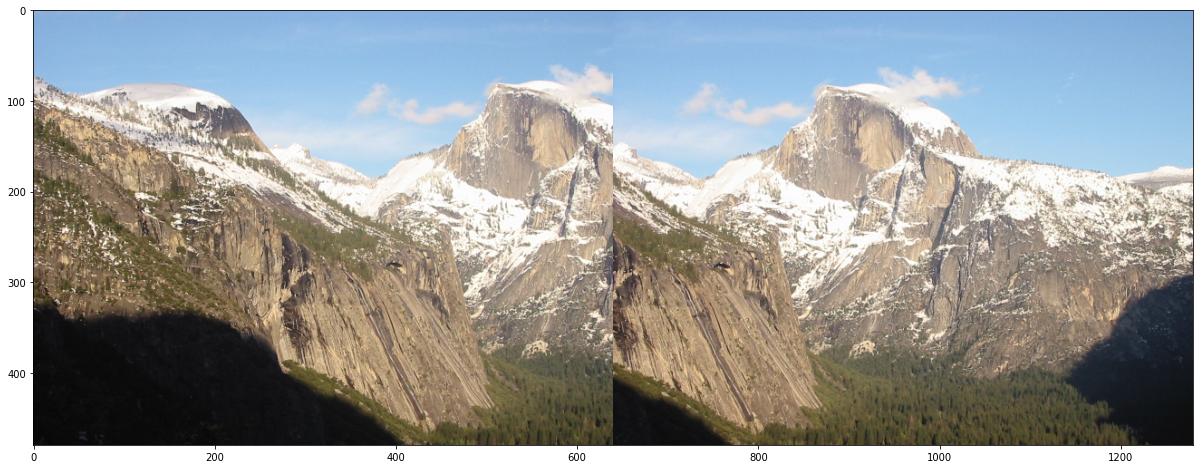

In [ ]:
base = "https://ist.vistec.ac.th/vll/supasorn/teaching/vision/proj2/images/"
dataset = "yosemite"

imgs = [np.float32(imageio.imread(f'{base}{dataset}/img{x}.jpg')[..., :3] / 255. ) for x in [0, 1]]

def join(imgs, dim=1):
  return np.concatenate(imgs, dim)

def show_image(img, width=22):
  plt.figure(figsize = (width, width * img.shape[0] // img.shape[1]))
  plt.imshow(img)

show_image(join((imgs[0], imgs[1])))

In [ ]:
# TODO 1: Implements non-maximum suppression for the score image.
# For every pixel location (i, j), look around its 8 immediate neighbors (3x3 patch)
# and see if that pixel has the highest score. If that pixel is not the maximum
# among its neighbors, set the score of that pixel to zero.
def NMS(score):
  return score


# TODO 2: Finds good features for img using the Harris Operator (Det / Trace).
# Returns a 3-tuple of
#   1. a sorted list of dictionaries, where each dictionary should have the
# following structure:
#   {
#      "pos": 2D location of this feature,
#      "dir": 2D principle direction,
#      "score": the feature goodness score (determinant / trace) after NMS
#   }
# E.g., the return value could look like this
# [{"pos": (0, 1), "dir": (1, 0), "score": 0.5}, {"pos": (3, 2), "dir": (0, -1), "score": 0.2}]
#
#   2. Image of det / trace before NMS()
#   3. Image of det / trace after NMS()
#
#   - Allowed: cv2.Sobel(), cv2.GaussianBlur(), np.linalg.eig()
#   - NOT allowed: opencv functions to find good features.
#   - Expected run-time speed: about 1-10 seconds. If your code is much slower than this
# try avoiding for loops and vectorizing your code: https://www.google.com/search?q=numpy+vectorization+tips
def find_features(img, max_num_features=300):
  # Let's convert it to gray, and operate on the gray-scale image for simplicity
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  # TODO: set these to det / trace before and after NMS()
  before = None
  after = None

  # TODO: Populate features
  features = []

  features.sort(key = lambda x: -x["score"])
  return features[:max_num_features], before, after

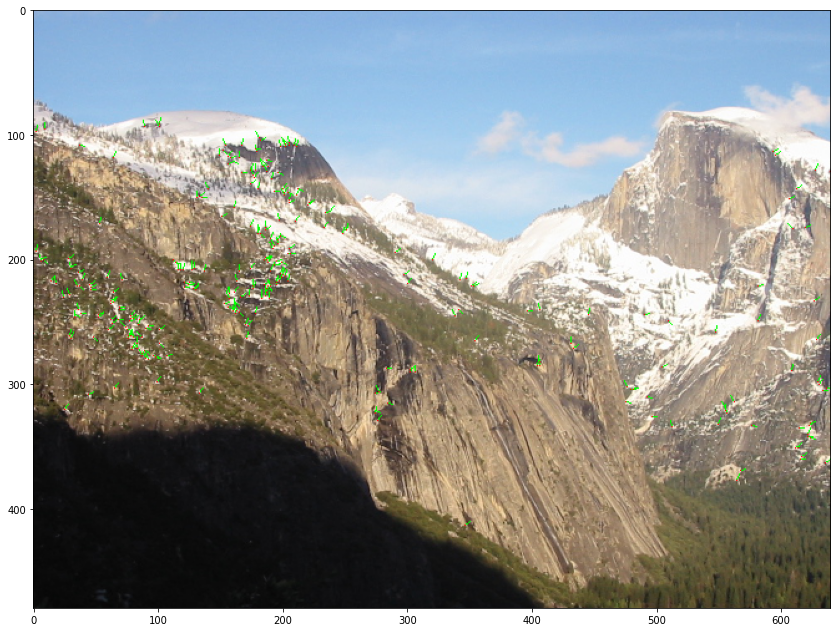

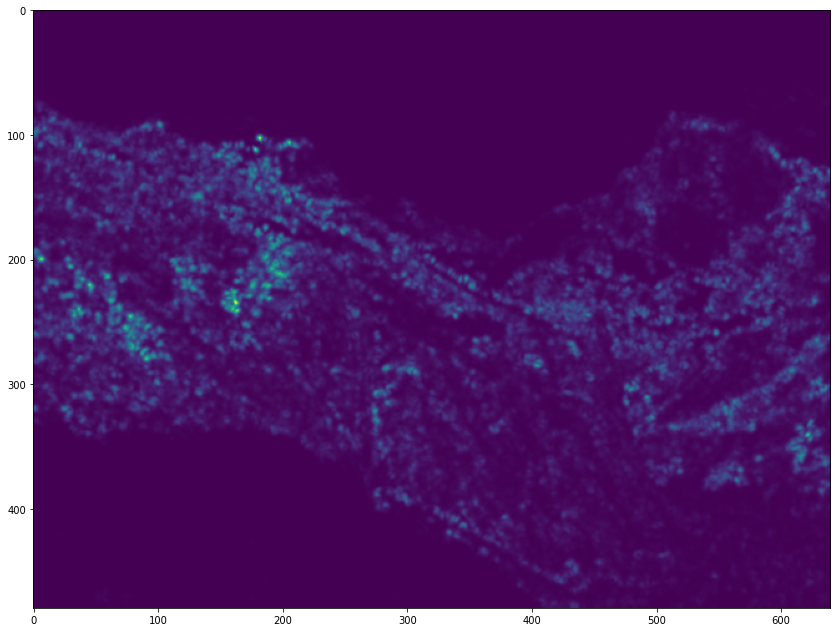

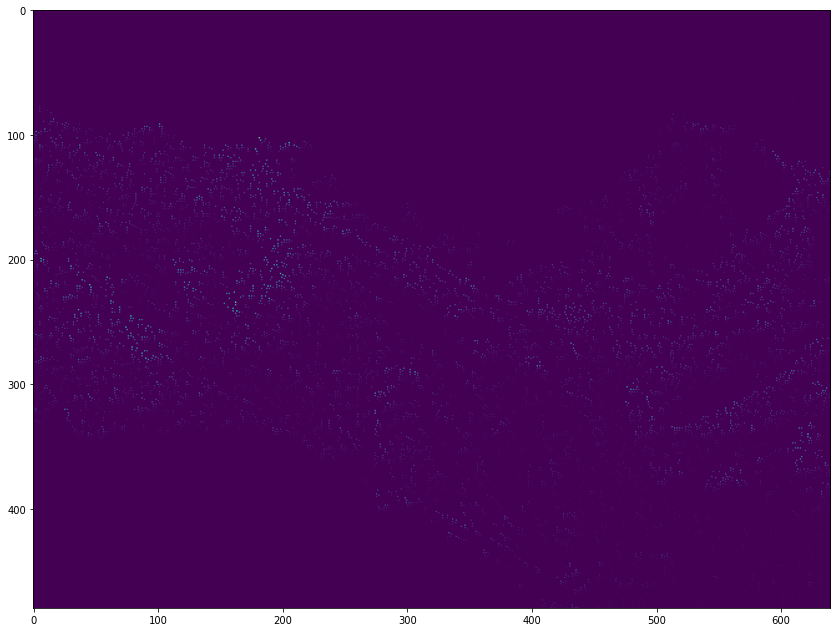

In [ ]:
# A unit test for feature detection that you should verify to make sure your
# result looks more or less like this, or reasonable.
def test_feature(img):
  def draw_features(img, features):
    for f in features:
      pos = f["pos"]
      dr = f["dir"]
      cv2.line(img, (pos[1], pos[0]), (int(pos[1] + dr[0] * 5), int(pos[0] + dr[1] * 5)), (0, 1.0, 0))
      img[f["pos"]] = [1.0, 0.0, 0.0]
    return img
  f, before, after = find_features(img)
  show_image(draw_features(np.copy(img), f), 15)
  show_image(before, 15)
  show_image(after, 15)

test_feature(imgs[0])

In [ ]:
# TODO 3: Implements bilinear interpolation.
# Returns the pixel value at location (x, y) where x, y can be floating points
#   - NOT allowed: opencv functions.
def bilinear_interpolate(img, x, y):
  return None

# TODO 4: Generates a descriptor for the feature f.
# This function grabs a rotated 40x40 patch centered at pos from img that's
# aligned with the principle direction and resizes that patch into 8x8. Also,
# it normalizes the patch by subtracting the mean and dividing it by the std
# for each RGB channel.
#   - Use: your own bilinear_interpolate() function.
#   - NOT allowed: opencv warping functions.
# * A clever solution may avoid resizing the grabbed patch into 8x8.
def generate_descriptors_worker(f, img):
  return None

def generate_descriptors(img, features):
  p = Pool(16)
  fn = partial(generate_descriptors_worker, img=img)
  descriptors = p.map(fn, features)
  for x in zip(features, descriptors):
    x[0]["desc"] = x[1]

# TODO 5: Returns a list whose size equals the size of feature0 where each element
# of this list is the index to the best matched feature in feature1.
# Also, check the ratio test, if the distance of the best match divided by the
# distance of the second best match >= 0.7, consider this as a bad, ambiguous match
# and put -1 for that element instead of the index to indicate no matches.
# You can use 0.7 or find a better threshold.
def matching(features0, features1):
  return None


Finding features for img0...
Generating descriptors for img0...
Finding features for img1...
Generating descriptors for img1...
Matching...


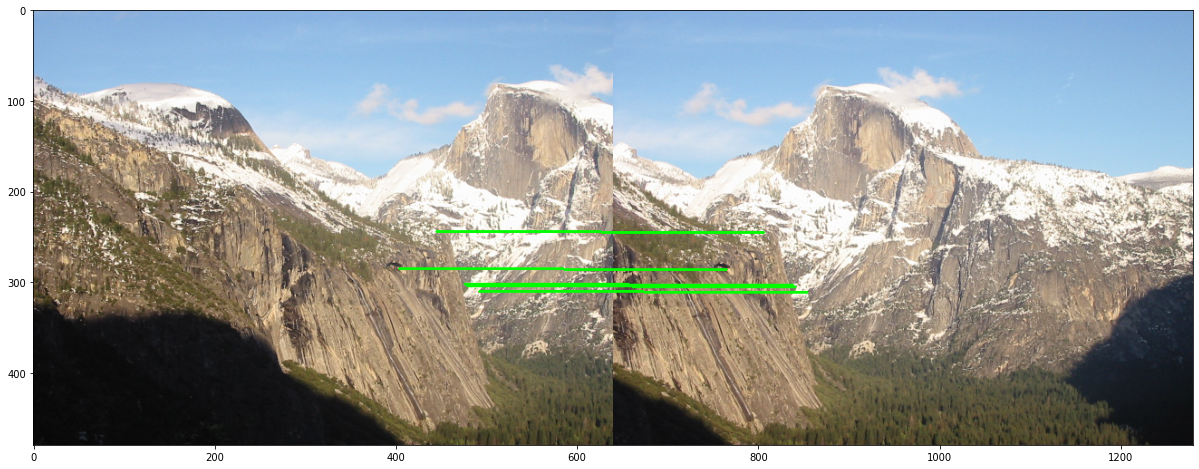

In [ ]:
def find_feature_and_match(imgs):
  features = [None, None]
  for i in range(2):
    print(f"Finding features for img{i}...")
    features[i], _, _ = find_features(imgs[i])
    print(f"Generating descriptors for img{i}...")
    generate_descriptors(cv2.GaussianBlur(imgs[i], (7, 7), 0), features[i])

  print("Matching...")
  matches = matching(features[0], features[1])
  return features, matches

# A unit test for feature matching.
def test_matching(imgs, draw_points=5):
  features, matches = find_feature_and_match(imgs)
  combined = join((imgs[0], imgs[1]))
  for i0, f0 in enumerate(features[0]):
    if matches[i0] != -1:
      f1 = features[1][matches[i0]]
      cv2.line(combined, (f0["pos"][1], f0["pos"][0]), (f1["pos"][1] + imgs[0].shape[1], f1["pos"][0]), (0, 1, 0), 2)
      draw_points -= 1
      if draw_points == 0: break
  show_image(combined)

test_matching(imgs, 5)

Finding features for img0...
Generating descriptors for img0...
Finding features for img1...
Generating descriptors for img1...
Matching...
Homography
 [[ 1.05801757e+00 -3.18327473e-03 -2.96574640e+02]
 [ 2.62047265e-02  1.03686946e+00 -9.82104251e+00]
 [ 9.04592835e-05 -2.57715368e-06  1.00000000e+00]]
Time: 28.96311664581299


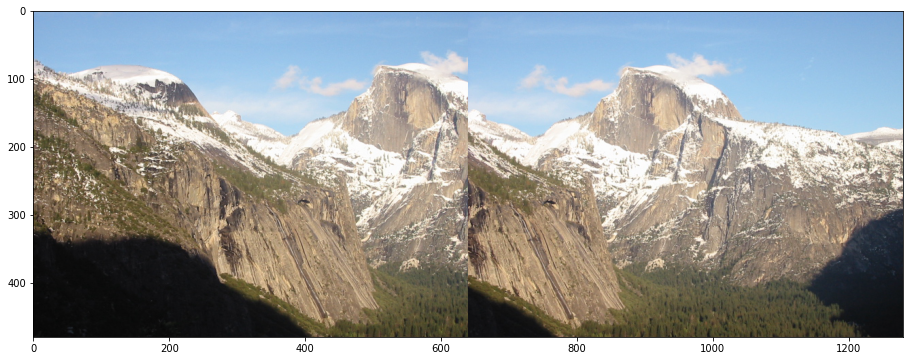

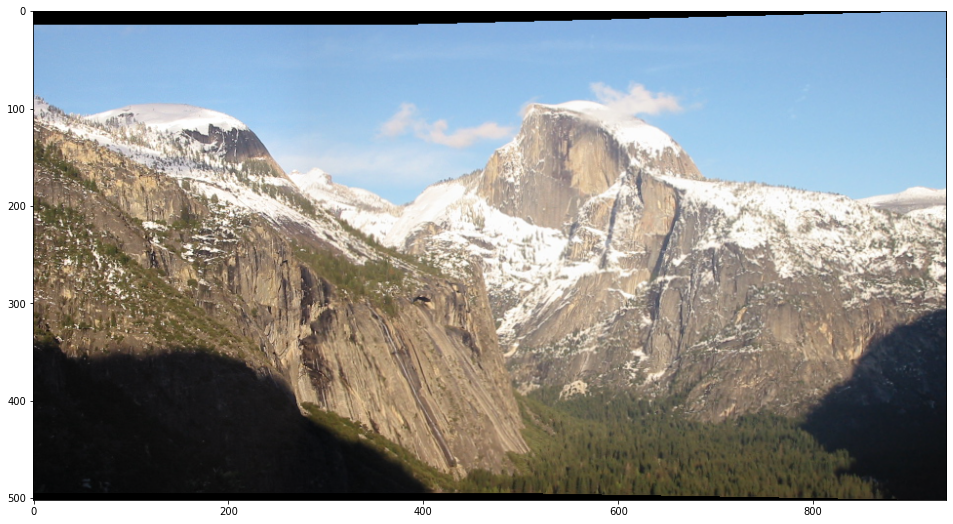

In [ ]:
# TODO 6: Returns a list that contains the indices of the inliers with respect to H.
# The match is considered an inlier if ps1 is close to H * ps0.
# You need to compute this distance in the pixel space, so you would need to make
# these into homogeneous coordinates and dehomogenize them into pixel locations.
def count_inliers(ps0, ps1, H):
  return None


# TODO 7: Given the matched features in ps0 and ps1, solve for the Homography that
# maps points from ps0 to ps1. I.e., ps1 = H ps0. To solve this, we can turn the
# problem into Ax = b by creating matrices A and b and fill the elements with
# appropriate values. Then use numpy.linalg.solve() or np.linalg.pinv() or by
# solving the normal equation.
def solve_for_homography(ps0, ps1):
  return None


# TODO 8: Computes the Homography using RANSAC. In addition, we will compute the final
# Homography using ALL the inliers from the Homography with the most inliers found
# from RANSAC.
# This homography maps points from img0 to img1. I.e., img1 = H * img0.
def estimate_homography(features0, features1, matches):
  return None


def create_gaussian_pyramid(img, level=5):
  pys = [img]
  for i in range(level-1):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = cv2.resize(img, (int(img.shape[1] / 2), int(img.shape[0] / 2)), interpolation=cv2.INTER_AREA)
    pys.append(img)
  return pys


def create_laplacian_pyramid(img, level=5):
  pys = create_gaussian_pyramid(img, level)
  for i in range(level-1):
    pys[i] = pys[i] - cv2.resize(pys[i+1], (pys[i].shape[1], pys[i].shape[0]))
  return pys


# TODO 9: Fill in the missing piece of code below.
# This function does seamless blending of two images using Laplacian blending.
def laplacian_blending(imgs, masks, level):
  summask = masks[0] + masks[1] + 1e-10
  img_lp = [None] * 2
  mask_lp = [None] * 2

  for i in range(2):
    img_lp[i] = create_laplacian_pyramid(imgs[i], level)
    mask_lp[i] = create_gaussian_pyramid(masks[i] / summask, level)

  output_lp = []
  for i in range(len(img_lp[0])):
    output_lp.append((img_lp[0][i] * mask_lp[0][i] + img_lp[1][i] * mask_lp[1][i]))

  # TODO: Collapses the merged Laplacian pyramid (output_lp) into a final
  # output image. Don't forget to clip the output to 0 - 1. Hint: 4-5 lines of
  # code should suffice.
  return None


# For debugging purpose.
def stupid_blending(imgs, masks):
  summask = masks[0] + masks[1] + 1e-10
  return (imgs[0] * masks[0] + imgs[1] * masks[1]) / summask


# The main panorama stitching routine is given to you. Yay! If you don't like
# anything here, you can change it. If you can improve it, extra points!
# The whole method takes 20-60 seconds to run using the solution code.
# (The speed depends on the kind of machine colab gives you and its current
# emotional state)
def panorama_stitch(imgs):

  def inpaint(img, mask):
    imguint8 = np.uint8(img * 255)
    maskuint8 = np.uint8(mask * 255)
    return np.float32(cv2.inpaint(imguint8, maskuint8[..., 0], 3, cv2.INPAINT_TELEA) / 255.0)

  def determine_boundary(shape, H):
    coords = np.array([[0, 0, 1], [0, shape[0]-1, 1], [shape[1]-1, 0, 1], [shape[1]-1, shape[0]-1, 1], [(shape[1]-1)/2, (shape[0]-1)/2, 1]])
    o = H @ coords.T
    o = o[:2, :] / o[2:, :]
    x = o[0, :]
    y = o[1, :]
    return np.min(x), np.max(x), np.min(y), np.max(y), x[4], y[4]

  start = time.time()

  features, matches = find_feature_and_match(imgs)
  H = estimate_homography(features[0], features[1], matches)
  print("Homography\n", H)

  minx, maxx, miny, maxy, cx, cy = determine_boundary(imgs[1].shape, np.linalg.inv(H))
  minx = np.minimum(0, minx)
  maxx = np.maximum(imgs[0].shape[1]-1, maxx)
  miny = np.minimum(0, miny)
  maxy = np.maximum(imgs[0].shape[0]-1, maxy)

  output_shape = (int(np.ceil(maxx) - np.floor(minx)), int(np.ceil(maxy) - np.floor(miny)))
  shift_matrix = np.array([[1.0, 0.0, np.floor(minx)], [0.0, 1.0, np.floor(miny)], [0, 0, 1]])

  outputs = [cv2.warpPerspective(imgs[0], shift_matrix, output_shape, flags=cv2.WARP_INVERSE_MAP + cv2.INTER_LINEAR),
            cv2.warpPerspective(imgs[1], H @ shift_matrix, output_shape, flags=cv2.WARP_INVERSE_MAP + cv2.INTER_LINEAR)]

  masks = [cv2.warpPerspective(np.ones_like(imgs[0]), shift_matrix, output_shape, flags=cv2.WARP_INVERSE_MAP),
          cv2.warpPerspective(np.ones_like(imgs[1]), H @ shift_matrix, output_shape, flags=cv2.WARP_INVERSE_MAP)]

  kernel = np.ones((3, 3), np.float32)
  inpaints = [None] * 2
  for i in range(2):
    masks[i][masks[i] < 1] = 0
    eroded = cv2.erode(masks[i], kernel, iterations = 1)
    inpaints[i] = inpaint(outputs[i], 1-eroded)


  # You may want to use this for debugging your homography
  # output = stupid_blending(inpaints, masks)

  mk = np.clip(masks[0] - masks[1], 0, 1) # pretty stupid masking here. feel free to improve.
  output = laplacian_blending(inpaints,
                              [mk, 1-mk],
                              int(np.log2(np.max(masks[0].shape) / 2)))

  output *= np.float32((masks[0] > 0) | (masks[1] > 0))
  print(f"Time: {time.time() - start}")
  show_image(join((imgs[0], imgs[1])), 18)
  show_image(output, 18)

panorama_stitch(imgs)

In [ ]:
# Run this final test for submission
def test_for_submission():
  base = "https://ist.vistec.ac.th/vll/supasorn/teaching/vision/proj2/images/"
  tests = [("yosemite/img0.jpg", "yosemite/img1.jpg"),
           ("lake/img0.jpg", "lake/img1.jpg"),
           ("graf/img0.jpg", "graf/img1.jpg")]

  for test in tests:
    print(test)
    imgs = [np.float32(imageio.imread(f'{base}{test[0]}')[..., :3] / 255. ),
            np.float32(imageio.imread(f'{base}{test[1]}')[..., :3] / 255. )]
    panorama_stitch(imgs)

test_for_submission()